In [1]:
%matplotlib nbagg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from itertools import product, combinations
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib import rc
rc('animation', html='html5')

from ipywidgets import widgets
from ipywidgets.widgets import *
from IPython.display import display

<IPython.core.display.Javascript object>


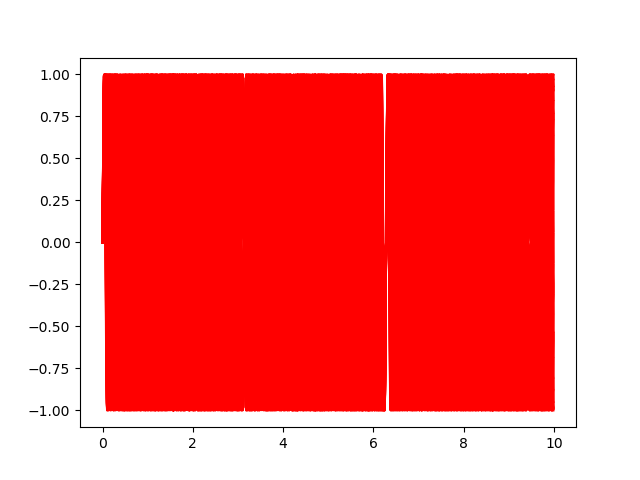

In [4]:
fig = plt.figure()
x = np.arange(0, 10, 0.01)

ims = []
for a in range(1,50):
    y = np.sin(x * a)
    im = plt.plot(x, y, "r")
    ims.append(im)

#ani = animation.ArtistAnimation(fig, ims)
plt.show()

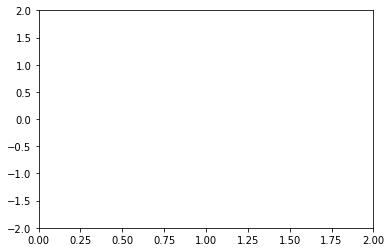

In [18]:
%matplotlib inline
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

## Save to Gif (requires ImageMagick installed)

In [10]:
anim.save('animation.gif', writer='imagemagick', fps=60)

# Image(url='animation.gif')

## Save to MP4 (requires ffmpeg, which comes with ImageMagick installer on Windows)

In [12]:
mywriter = animation.FFMpegWriter(fps=30)
anim.save('animation.flv', writer=mywriter)

### An example with Ricker wavelet

We want something more dynamically changing.

In [13]:
from scipy import signal

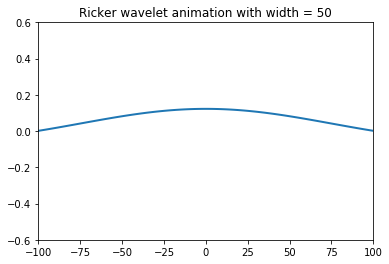

In [24]:
points = 100
x = np.linspace(-100, 100, points)
widths = np.arange(1, 51)
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-100, 100))
ax.set_ylim((-.6, .6))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    y = signal.ricker(points, widths[i])
    line.set_data(x, y)
    ax.set_title('Ricker wavelet animation with width = {}'.format(widths[i]))
    return (line,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(widths), interval=20, blit=True)
#anim.save('animation.gif', writer='imagemagick', fps=60)
anim.save('animation.mp4', writer=mywriter)